In [32]:
import numpy as np;
import pandas as pd;
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score;
from sklearn.preprocessing import StandardScaler;
import matplotlib.pyplot as plt;

In [3]:
df = pd.read_csv("./heart_disease_data.csv");

In [46]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [8]:
x = df.drop('target',axis=1).values
y = df['target'].values

In [26]:
print(x[200:205])

[[ 44.    1.    0.  110.  197.    0.    0.  177.    0.    0.    2.    1.
    2. ]
 [ 60.    1.    0.  125.  258.    0.    0.  141.    1.    2.8   1.    1.
    3. ]
 [ 58.    1.    0.  150.  270.    0.    0.  111.    1.    0.8   2.    0.
    3. ]
 [ 68.    1.    2.  180.  274.    1.    0.  150.    1.    1.6   1.    0.
    3. ]
 [ 62.    0.    0.  160.  164.    0.    0.  145.    0.    6.2   0.    3.
    3. ]]


In [25]:
print(y[200:205])

[0 0 0 0 0]


In [10]:
scaler = StandardScaler();
scaler.fit_transform(x)

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
print(x_train.shape)
print(x_test.shape)

(242, 13)
(61, 13)


In [38]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
]

In [39]:
best_accuracy = 0
best_model = None
test_accuracy_scores = []
train_accuracy_scores = []

for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy_test = accuracy_score(y_test, predictions)
    predictions = model.predict(x_train);
    accuracy_train = accuracy_score(y_train, predictions)
    test_accuracy_scores.append(accuracy_test)
    train_accuracy_scores.append(accuracy_train)
    
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = model

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


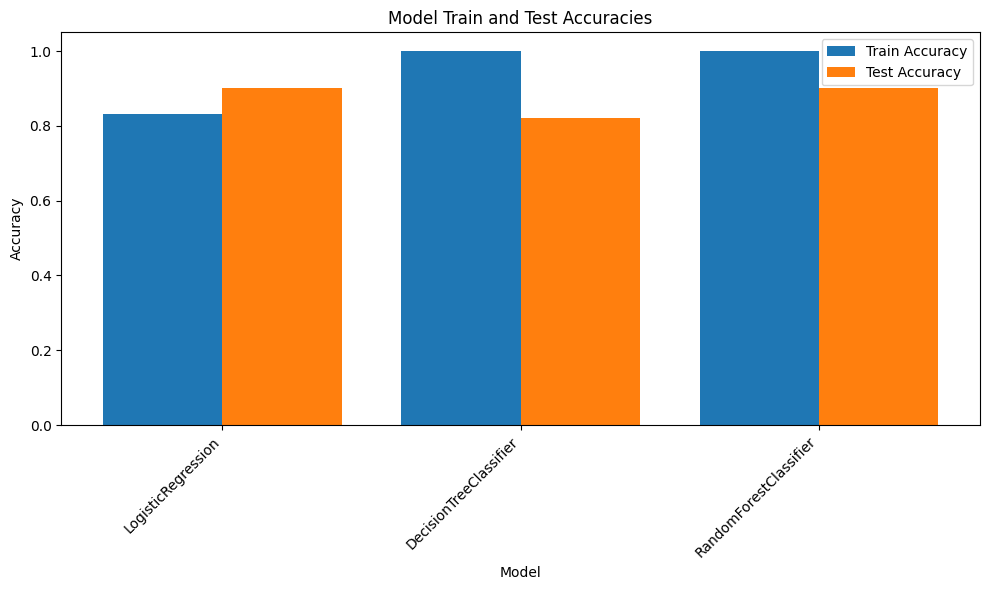

In [40]:
plt.figure(figsize=(10, 6))
x = range(len(models))
width = 0.4

plt.bar(x, train_accuracy_scores, width, label='Train Accuracy')
plt.bar([i + width for i in x], test_accuracy_scores, width, label='Test Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Train and Test Accuracies')
plt.xticks([i + width/2 for i in x], [str(model).split('(')[0] for model in models], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: LogisticRegression()
Best Accuracy: 0.9016393442622951


In [43]:
import joblib;

In [44]:
joblib.dump(RandomForestModel,'heart_model.joblib')
joblib.dump(scaler,'heart_scaler.joblib')

['heart_scaler.joblib']